## 1. Pip installs
    -Pip Installs everything needed
    -run ```conda install pytorch torchvision torchaudio pytorch-cuda -c pytorch -c nvidia```

In [ ]:
%pip install opencv-python  matplotlib supervision 
%pip install git+https://github.com/facebookresearch/segment-anything.git
%pip uninstall opencv-python-headless
%pip uninstall opencv-python
%pip install opencv-python
%pip install ultralytics

## 2. Imports
    -Imports everything needed
    -Imports picture 
    -Initalizes YOLO Model

In [1]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamPredictor


In [11]:
# imagepath = 'roy-mustang.jpg'
imagepath = 'Screenshot_53.png'
image = cv2.imread(imagepath)
cv2.imshow('image', image)
cv2.waitKey(0)

-1

In [16]:
from ultralytics import YOLO 
import pickle 

model = YOLO('yolov8n.pt')
names = model.names
objects = model(image)



0: 544x640 1 dog, 1 teddy bear, 160.0ms
Speed: 15.6ms preprocess, 160.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)


## 3. Helper Function
    -Plots area around image
    

In [13]:
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [19]:
for obj in objects:
    for x in obj.boxes.cls:
        print(names[int(x)])


dog
teddy bear


Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16., 77.])
conf: tensor([0.7785, 0.3933])
data: tensor([[  7.7261,   7.6079, 218.5803, 173.2077,   0.7785,  16.0000],
        [  8.9499,   6.5203, 214.7219, 172.3081,   0.3933,  77.0000]])
id: None
is_track: False
orig_shape: (198, 242)
shape: torch.Size([2, 6])
xywh: tensor([[113.1532,  90.4078, 210.8542, 165.5999],
        [111.8359,  89.4142, 205.7720, 165.7878]])
xywhn: tensor([[0.4676, 0.4566, 0.8713, 0.8364],
        [0.4621, 0.4516, 0.8503, 0.8373]])
xyxy: tensor([[  7.7261,   7.6079, 218.5803, 173.2077],
        [  8.9499,   6.5203, 214.7219, 172.3081]])
xyxyn: tensor([[0.0319, 0.0384, 0.9032, 0.8748],
        [0.0370, 0.0329, 0.8873, 0.8702]])
Class: tensor([16., 77.])
cls: tensor([16., 77.])
output_index: tensor([16., 77.])
Class Name: dog
x1: 7
x2: 218
y1: 7
y2: 173
[  7   7 218 173]
[[  7   7 218 173]]


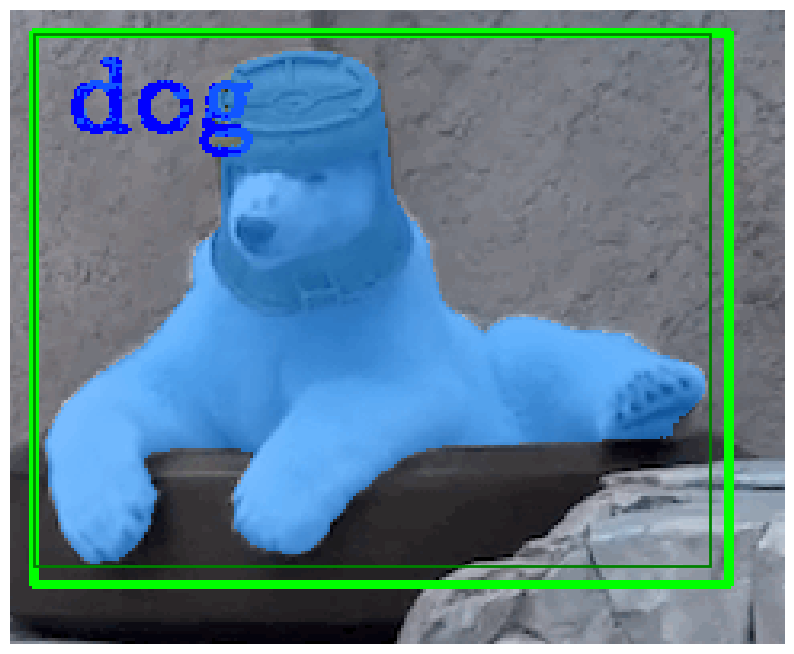

Class Name: teddy bear
x1: 7
x2: 218
y1: 7
y2: 173
[  7   7 218 173]
[[  7   7 218 173]]


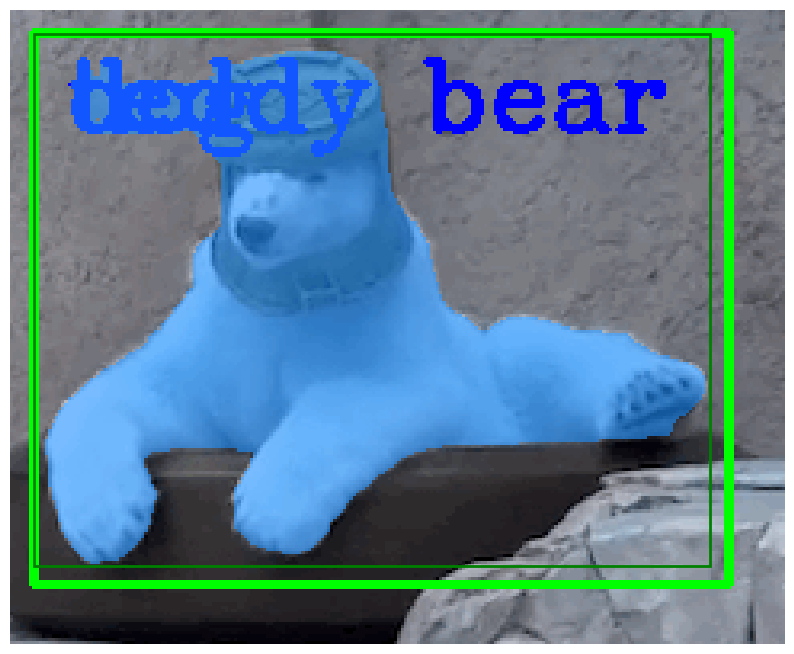

In [21]:
#plot a rectangle around the obj in the image
for obj in objects:
    boxes = obj.boxes #grab box obj 
    print(f'Boxes: {boxes}')
    
    cls = boxes.cls
    print(f'Class: {cls}')
    print(f'cls: {cls}')
    output_index = cls
    print(f'output_index: {output_index}')
    
    id_counter = 0
    for x in output_index:
        id_counter+=1
        class_name = names[int(x)]
        print(f'Class Name: {class_name}')

        xyxy_coordinates =boxes.xyxy.cpu().numpy()
        x1,y1,x2,y2 = map(int,xyxy_coordinates[0])
        print(f'x1: {x1}')
        print(f'x2: {x2}')
        print(f'y1: {y1}')
        print(f'y2: {y2}')

        cv2.rectangle(image, (x1, y1, x2, y2), (0,255,0),2)
        cv2.putText(image, class_name, (x1+10,y1+30), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sam_model_path ='sam_vit_h_4b8939.pth' 
        # device = 'cuda'
        model_type = 'vit_h'
        sam = sam_model_registry[model_type](checkpoint=sam_model_path)
        # sam.to(device=device)
        predictor = SamPredictor(sam)
        predictor.set_image(image)

        input_box = np.array([x1,y1,x2,y2])
        print(input_box)
        print(input_box[None, :])
        masks, scores,logits = predictor.predict(point_coords = None, point_labels=None, 
                                                multimask_output=False,
                                                box = input_box[None,:])
        plt.figure(figsize=(10,10))
        plt.imshow(image)

        show_mask(masks[0], plt.gca())
        show_box(input_box, plt.gca())
        plt.axis('off')
        plt.savefig(f'bruh_id_{id_counter}.jpg')
        plt.show()


[320   1 988 698]
[[320   1 988 698]]


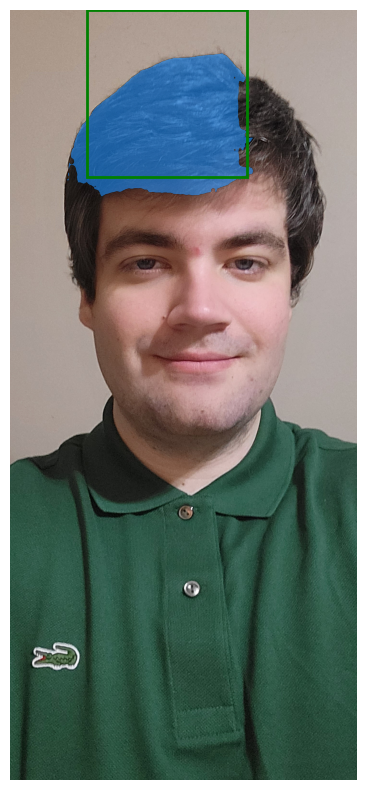

In [33]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sam_model_path ='sam_vit_h_4b8939.pth' 
# device = 'cuda'
model_type = 'vit_h'
sam = sam_model_registry[model_type](checkpoint=sam_model_path)
# sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)

input_box = np.array([x1,y1,x2,y2])
print(input_box)
print(input_box[None, :])
masks, scores,logits = predictor.predict(point_coords = None, point_labels=None, 
                                        multimask_output=False,
                                        box = input_box[None,:])
plt.figure(figsize=(10,10))
plt.imshow(image)

show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.savefig('bruh2.jpg')
plt.show()


In [30]:
xyxy_coordinates

array([[     320.92,      1.1217,      988.86,      698.49]], dtype=float32)